In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [377]:
np.random.seed(0)
n = 10

X = np.linspace(0, 1, n)[:, np.newaxis]
Y = np.sin(2 * np.pi * X) + 0.02 * np.random.normal(size=n)[:, np.newaxis]

In [383]:
class PolynomialRegression():
    def __init__(self, degree = 1):
        self.degree = degree

        self.w = np.zeros(self.degree)
        self.b = 0

        self._model = lambda x: self.w.dot(x) + self.b

    def __call__(self, x):
        return self._model(self._preprocess(x))

    def train(self, X, Y, epoch = 10, learning_rate = 0.01, lasso = 0, ridge = 0):
        m = len(X)

        costs = []

        sign = lambda x : 1 if x >= 0 else -1

        for _ in range(epoch):
            cost = 0

            for index in range(m):
                x, y = self._preprocess(X.item(index)), Y.item(index)

                prediction = self._model(x)

                error = prediction - y

                loss = (error ** 2) / 2

                cost += loss

                l1_update = lasso * np.array(list(map(sign, self.w)))

                l2_update = (2 * ridge) * self.w

                regularization_term = l1_update + l2_update

                update_term = ((error * x) + regularization_term)

                self.w -= learning_rate * update_term

                self.b -= learning_rate * error

            costs.append(cost)

        return costs

    def _preprocess(self, x):
        return np.array([x ** i for i in range(1, self.degree + 1)])

In [384]:
poly = PolynomialRegression(9)
poly_costs = poly.train(X, Y, 2000, 0.01)

0.0012447522717255908
0.41584363697670423
0.3942690375595274
1.172833903192763
24.465913163265796
14891.274302186423
106007000.2630566
7385422008055.175
4.3960970508823434e+18
1.994034826511699e+25
2.0855726020690004e+27
9.91062549616589e+27
2.742803598457665e+28
2.5631174753403924e+26
5.359372461407149e+26
4.386332353972094e+29
3.1078573381168546e+33
2.1652728768646366e+38
1.2888565177810678e+44
5.846151149885262e+50
6.114523429406739e+52
2.9056169867333632e+53
8.041406397643056e+53
7.514599031327672e+51
1.5712715275208737e+52
1.285993684460767e+55
9.111678246186842e+58
6.348190287634143e+63
3.77869529321372e+69
1.7139862761077244e+76
1.7926681972887368e+78
8.518745942763055e+78
2.35759559628142e+79
2.203145159940106e+77
4.6066852620846515e+77
3.770301981279085e+80
2.6713800354922235e+84
1.8611751137051437e+89
1.1078454367859132e+95
5.0250992137677686e+101
5.2557804425360166e+103
2.4975429579563057e+104
6.912045879480265e+104
6.459225003931985e+102
1.3505971903780987e+103
1.1053846688

C:\Users\apmnh\AppData\Local\Temp\ipykernel_9476\3010304762.py:30: RuntimeWarning: overflow encountered in scalar power
  loss = (error ** 2) / 2
C:\Users\apmnh\AppData\Local\Temp\ipykernel_9476\3010304762.py:32: RuntimeWarning: overflow encountered in scalar power
  print(error ** 2)
C:\Users\apmnh\AppData\Local\Temp\ipykernel_9476\3010304762.py:42: RuntimeWarning: overflow encountered in multiply
  update_term = ((error * x) + regularization_term)
C:\Users\apmnh\AppData\Local\Temp\ipykernel_9476\3010304762.py:38: RuntimeWarning: invalid value encountered in multiply
  l2_update = (2 * ridge) * self.w


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [373]:
ridge_poly = PolynomialRegression(9)
ridge_poly_costs = ridge_poly.train(X, Y, 2000, 0.01, ridge=0.01)

In [374]:
lasso_poly = PolynomialRegression(9)
lasso_poly_costs = lasso_poly.train(X, Y, 2000, 0.01, lasso=0.01)

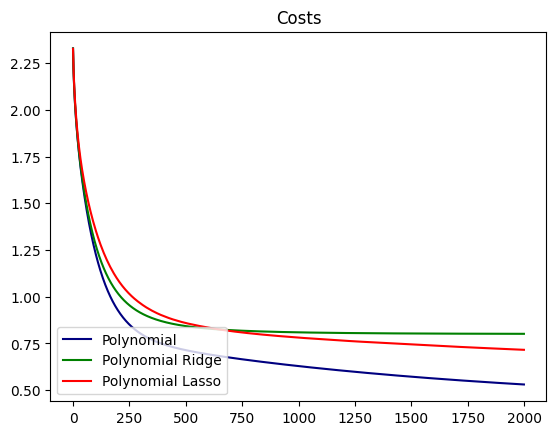

In [375]:
plt.plot(poly_costs, color='navy', label="Polynomial")
plt.plot(ridge_poly_costs, color='green', label="Polynomial Ridge")
plt.plot(lasso_poly_costs, color='red', label="Polynomial Lasso")

plt.title("Costs")
plt.legend(loc='lower left')

plt.show()

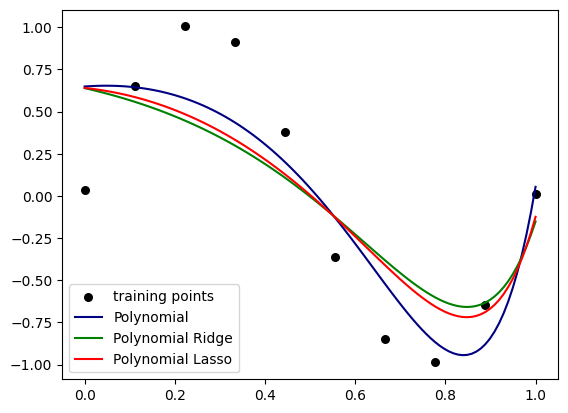

In [376]:
X_dummy = np.linspace(0, 1, 100)[:, np.newaxis]

plt.scatter(X, Y, color='black', s=30, marker='o', label="training points")

plt.plot(X_dummy, np.array(list(map(poly, X_dummy))), color='navy', label="Polynomial")

plt.plot(X_dummy, np.array(list(map(ridge_poly, X_dummy))), color='green', label="Polynomial Ridge")

plt.plot(X_dummy, np.array(list(map(lasso_poly, X_dummy))), color='red', label="Polynomial Lasso")

plt.legend(loc='lower left')
plt.show()